<b><font size="10"><center>Heart Failure Prediction</center></font></b>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
heartdf = pd.read_csv('heart.csv')

<font size="3">Structure of our data</font>

In [55]:
heartdf.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [56]:
heartdf.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [57]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


***

# Data Visualizations

<b><font size="4">1. Correlation Matrix</font></b>

<AxesSubplot:>

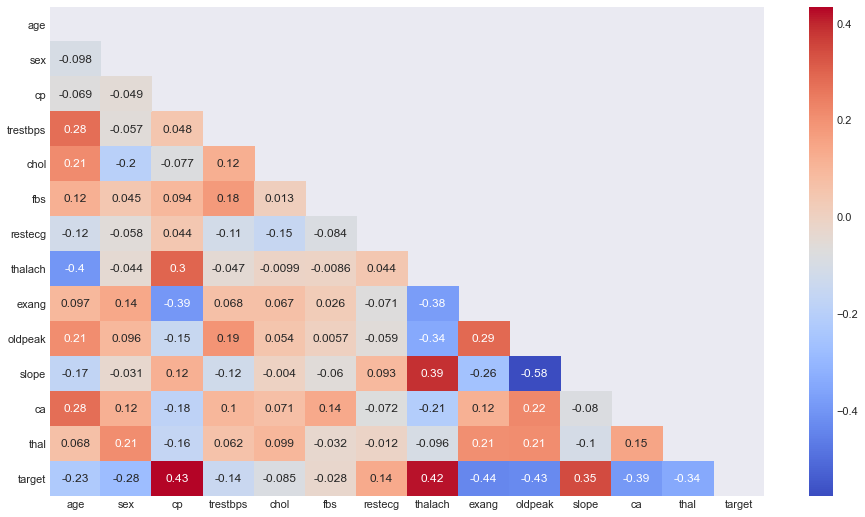

In [67]:
fig = plt.figure(figsize=[16, 9])
plt.style.use('seaborn-darkgrid')
sns.heatmap(hfp.corr(), annot=True, mask=np.triu(hfp.corr()), cmap='coolwarm')

In [59]:
##By this Heat map - we have the correlation values between columns.

##We don't have any redundant columns,ie.we dont have highly correlated columns, which can be removed.
##All the columns are lying between low positive correlation to low negative correlation.
##Most of the columns have negative correlation(column value increase will decrease the target value) with the target variable.


<b><font size="4">2. Box Whisker Plot</font></b>

Text(0.5, 1.0, '0: No Angina, 1:Angina | 0:NO Heart Disease,1:Heart Disease')

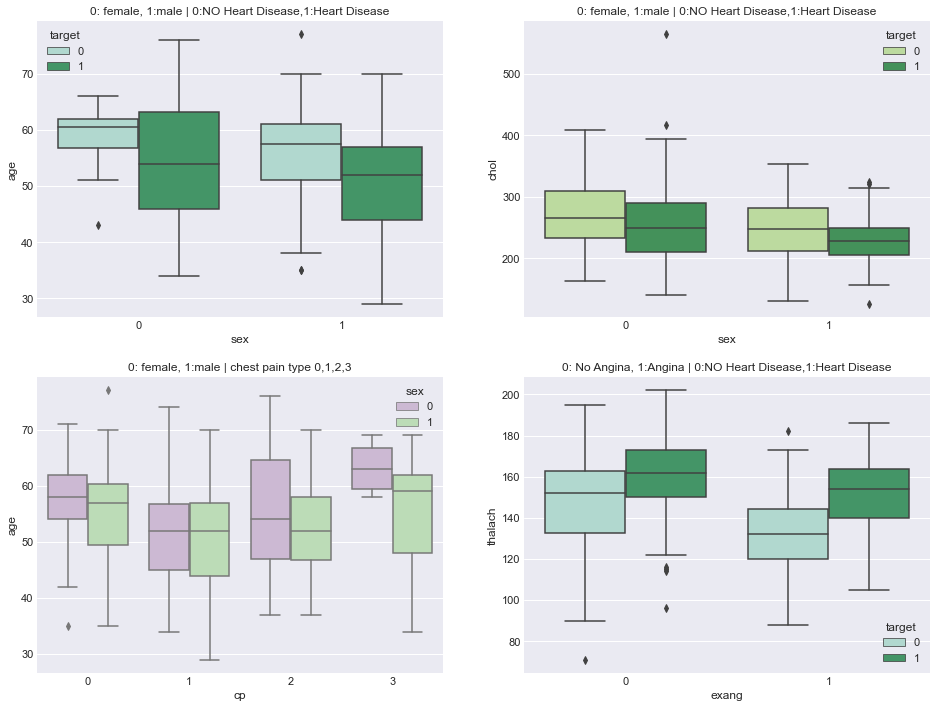

In [60]:
#BOX WHISKER PLOT-
#This is for looking outliers in the columns.
#This gives a five number summary[min,25,median,75,max] among the data values in a column.
#used to compare available data among two to three features.

fig,ax=plt.subplots(figsize=(16,12))
plt.subplot(221)
b1=sns.boxplot(x="sex",y="age",hue="target",data=heartdf,palette="BuGn")
b1.set_title("0: female, 1:male | 0:NO Heart Disease,1:Heart Disease")


plt.subplot(222)
b2=sns.boxplot(x="sex",y="chol",hue="target",data=heartdf,palette="YlGn")
b2.set_title("0: female, 1:male | 0:NO Heart Disease,1:Heart Disease")


plt.subplot(223)
b3=sns.boxplot(x="cp",y="age",hue="sex",data=heartdf,palette="PRGn")
b3.set_title("0: female, 1:male | chest pain type 0,1,2,3")


plt.subplot(224)
b4=sns.boxplot(x="exang",y="thalach",hue="target",data=heartdf,palette="BuGn")
b4.set_title("0: No Angina, 1:Angina | 0:NO Heart Disease,1:Heart Disease")


<b><font size="6">3. Count Plot</font></b>

Text(0.5, 1.0, 'Resting electrocardiographic results ')

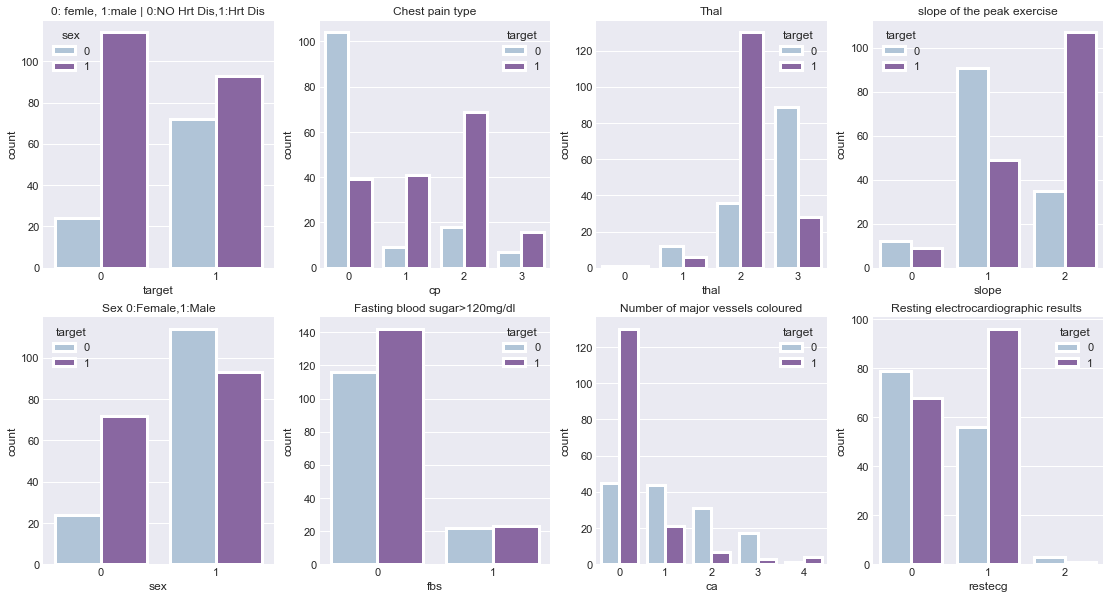

In [61]:
#COUNT PLOT-
#This is used to show the counts of the variables
#This can be used to depict 2 -3 variables.

fig,ax=plt.subplots(figsize=(19,10))

plt.subplot(241)
s1=sns.countplot(x='target',data=heartdf,hue='sex',palette='BuPu',linewidth=3)
s1.set_title('0: femle, 1:male | 0:NO Hrt Dis,1:Hrt Dis')

plt.subplot(242)
s2=sns.countplot(x='cp',data=heartdf,hue='target',palette='BuPu',linewidth=3)
s2.set_title('Chest pain type')

plt.subplot(243)
s3=sns.countplot(x='thal',data=heartdf,hue='target',palette='BuPu',linewidth=3)
s3.set_title('Thal')


plt.subplot(244)
s4=sns.countplot(x='slope',data=heartdf,hue='target',palette='BuPu',linewidth=3)
s4.set_title('slope of the peak exercise')

plt.subplot(245)
s5=sns.countplot(x='sex',data=heartdf,hue='target',palette='BuPu',linewidth=3)
s5.set_title('Sex 0:Female,1:Male')

plt.subplot(246)
s6=sns.countplot(x='fbs',data=heartdf,hue='target',palette="BuPu",linewidth=3)
s6.set_title('Fasting blood sugar>120mg/dl')

plt.subplot(247)
s7=sns.countplot(x='ca',data=heartdf,hue='target',palette='BuPu',linewidth=3)
s7.set_title('Number of major vessels coloured')

plt.subplot(248)
s8=sns.countplot(x='restecg',data=heartdf,hue='target',palette='BuPu',linewidth=3)
s8.set_title('Resting electrocardiographic results ')

<b><font size="4">4. Bar Plot</font></b>

Text(0.5, 1.0, 'Exang 0:No Angina,1:Yes Angina')

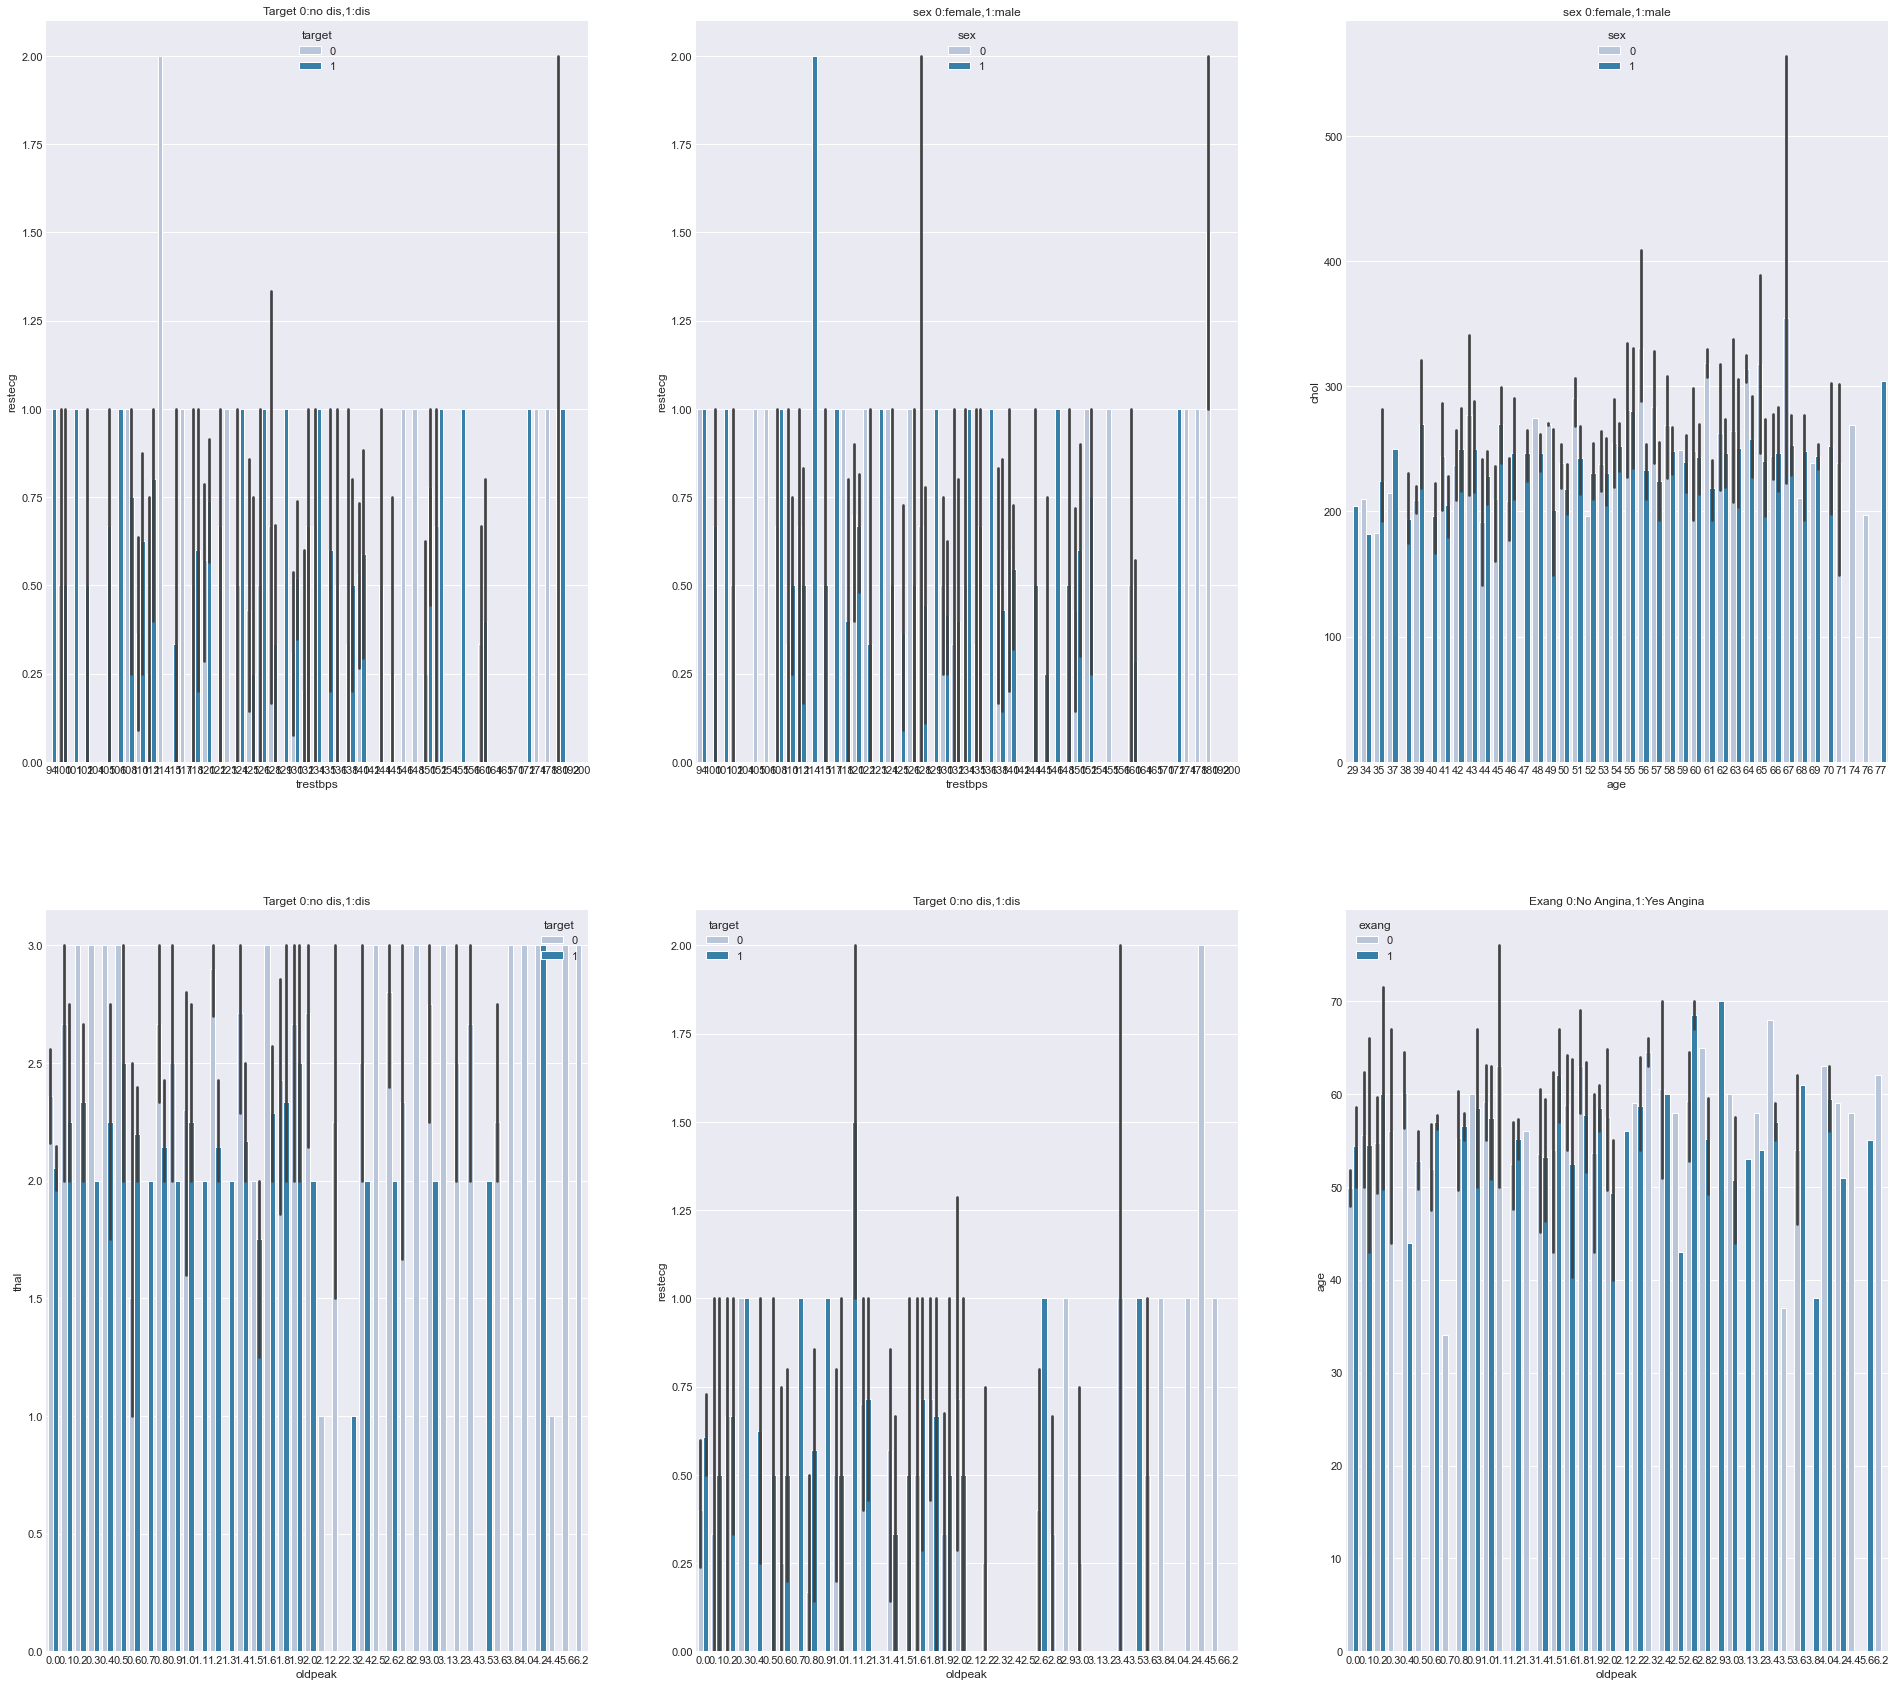

In [62]:
#BAR PLOT-
#This helps in finding the relationship between categorical and discrete variables.
#This also can be used to know relation between two continuos variable with binary data

fig,ax=plt.subplots(figsize=(33,30))
plt.subplot(231)
bx_1 = sns.barplot(x="trestbps", y="restecg", hue="target", data=heartdf,palette="PuBu")
bx_1.set_title("Target 0:no dis,1:dis")

plt.subplot(232)
bx_2 = sns.barplot(x="trestbps", y="restecg", hue="sex", data=heartdf,palette="PuBu")
bx_2.set_title("sex 0:female,1:male")

plt.subplot(233)
bx_3 = sns.barplot(x="age", y="chol", hue="sex", data=heartdf,palette="PuBu")
bx_3.set_title("sex 0:female,1:male")

plt.subplot(234)
bx_4 = sns.barplot(x="oldpeak", y="thal", hue="target", data=heartdf,palette="PuBu")
bx_4.set_title("Target 0:no dis,1:dis")

plt.subplot(235)
bx_5 = sns.barplot(x="oldpeak", y="restecg", hue="target", data=heartdf,palette="PuBu")
bx_5.set_title("Target 0:no dis,1:dis")

plt.subplot(616)
bx_6 = sns.barplot(x="oldpeak", y="age", hue="exang", data=heartdf,palette="PuBu")
bx_6.set_title("Exang 0:No Angina,1:Yes Angina")

<b><font size="4">5. Scatter Plot</font></b>

([<matplotlib.axis.XTick at 0x2ad6ed8ae50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

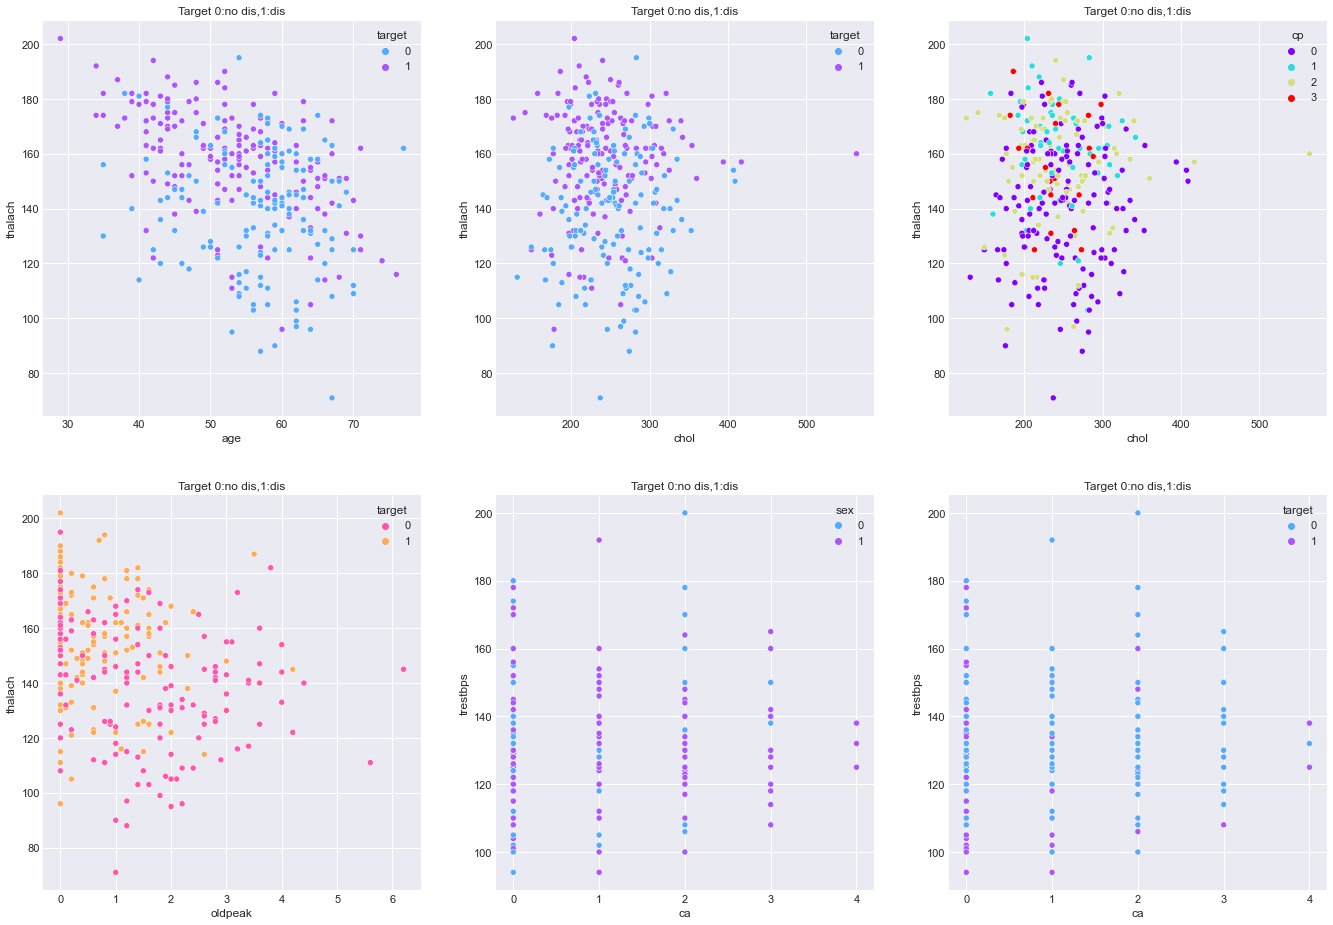

In [64]:
#SCATTER PLOT
#It is used to find the relationship between 2 variables.
#It helps to find outliers and correaltion between features.
fig,ax=plt.subplots(figsize=(23,16))
plt.subplot(231)
sp_1 = sns.scatterplot(x="age", y="thalach",hue="target",data=heartdf,palette="cool")
sp_1.set_title("Target 0:no dis,1:dis")
plt.subplot(232)
sp_2 = sns.scatterplot(x="chol", y="thalach",hue="target",data=heartdf,palette="cool")
sp_2.set_title("Target 0:no dis,1:dis")
plt.subplot(233)
sp_3 = sns.scatterplot(x="chol", y="thalach",hue="cp",data=heartdf,palette="rainbow")
sp_3.set_title("Target 0:no dis,1:dis")
plt.subplot(234)
sp_3 = sns.scatterplot(x="oldpeak", y="thalach",hue="target",data=heartdf,palette="spring")
sp_3.set_title("Target 0:no dis,1:dis")
plt.subplot(235)
sp_3 = sns.scatterplot(x="ca", y="trestbps",hue="sex",data=heartdf,palette="cool")
sp_3.set_title("Target 0:no dis,1:dis")
plt.xticks([0,1, 2, 3, 4])
plt.subplot(236)
sp_3 = sns.scatterplot(x="ca", y="trestbps",hue="target",data=heartdf,palette="cool")
sp_3.set_title("Target 0:no dis,1:dis")
plt.xticks([0,1, 2, 3, 4])

<b><font size="4">6. Pair Plot</font></b>

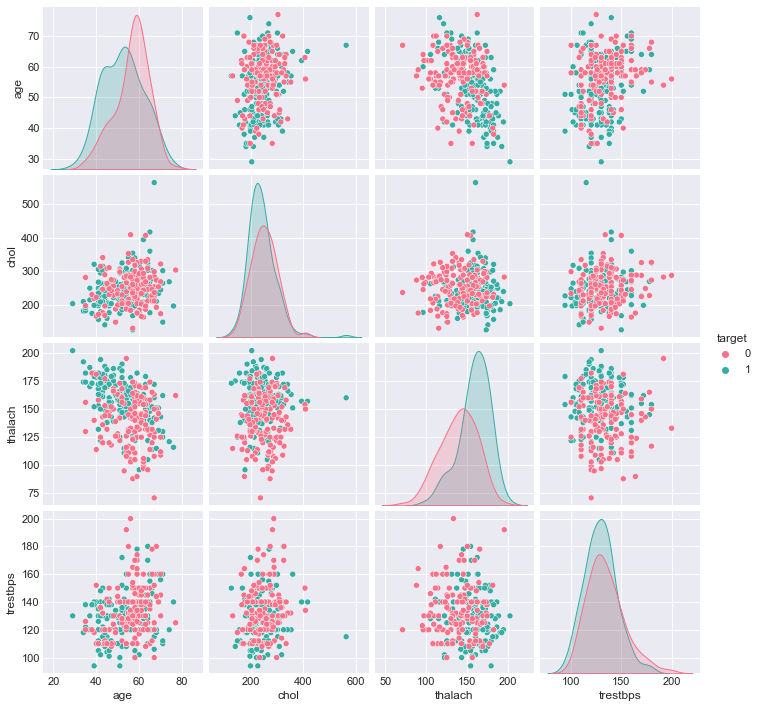

In [65]:
#Pair Plot
#This can be drawn to find the relationship of multiple features with respect to each other.
sns.pairplot(heartdf,hue="target",vars=["age","chol","thalach","trestbps"],palette="husl")

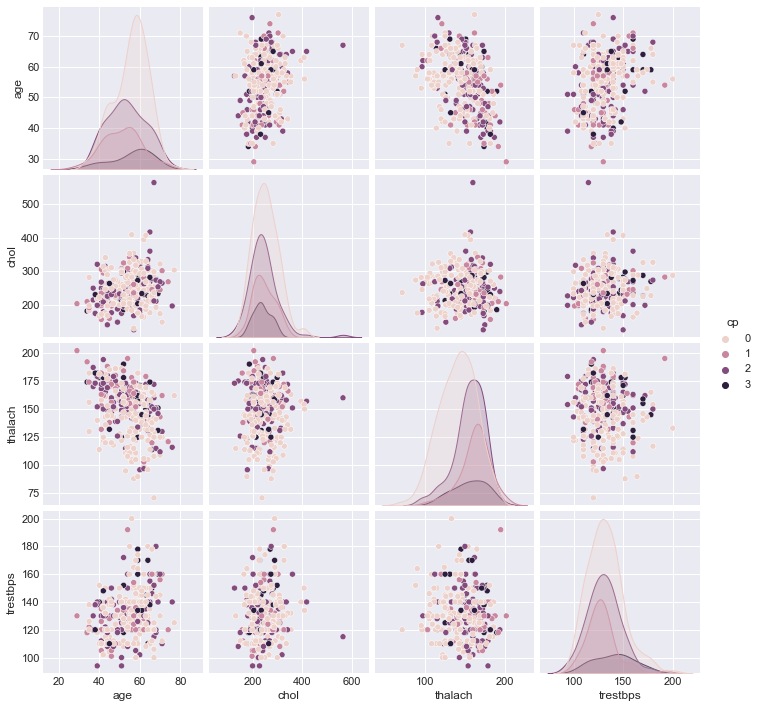

In [66]:
sns.pairplot(heartdf,hue="cp",vars=["age","chol","thalach","trestbps"])

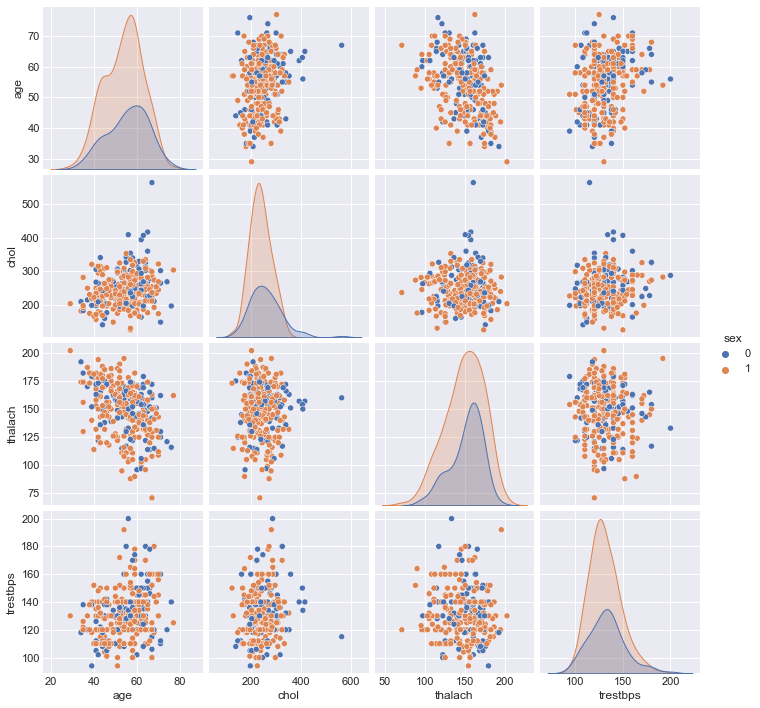

In [68]:
sns.pairplot(heartdf,hue="sex",vars=["age","chol","thalach","trestbps"])

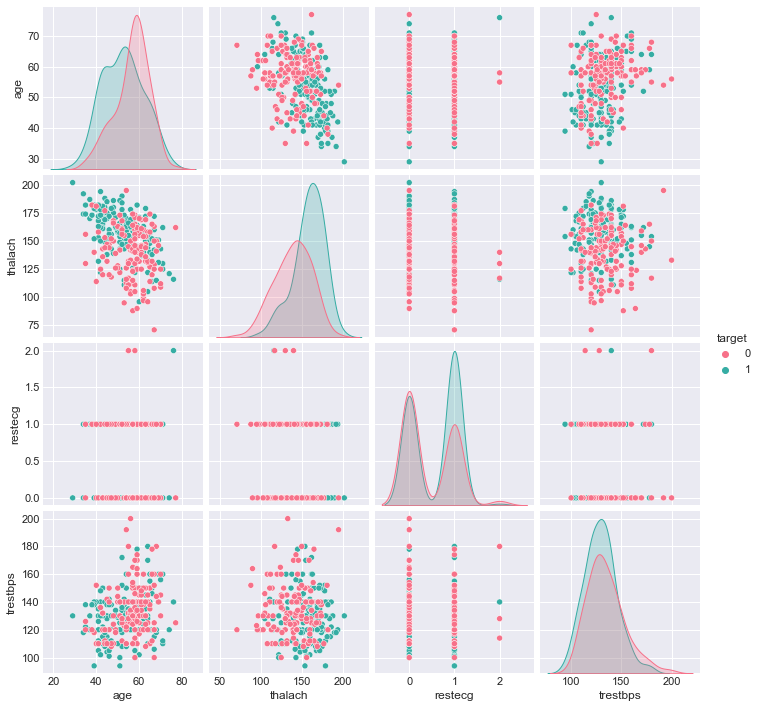

In [69]:
sns.pairplot(heartdf,hue="target",vars=["age","thalach","restecg","trestbps"],palette="husl")

<b><font size="4">7. Joint Plot</font></b>

In [70]:
#JOINTPLOT
#This is drawn between two features.

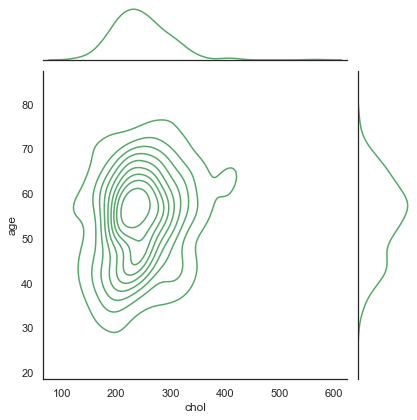

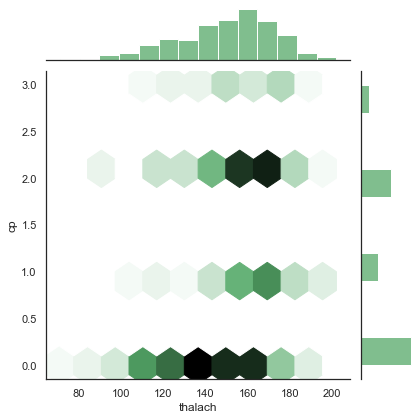

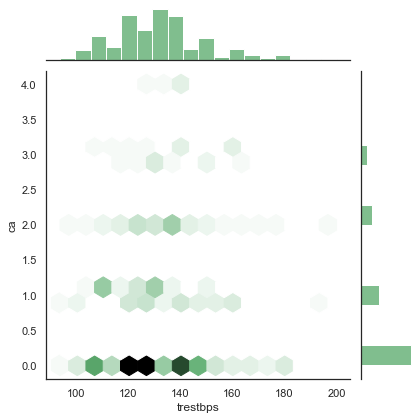

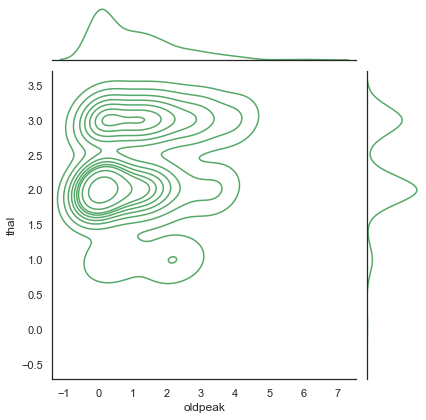

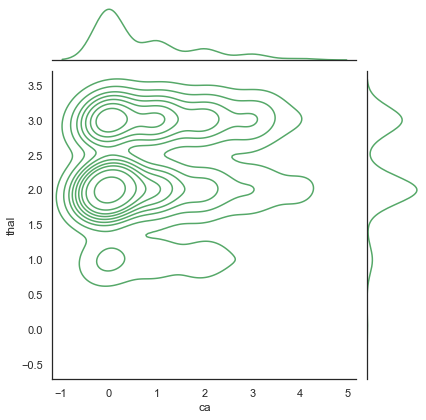

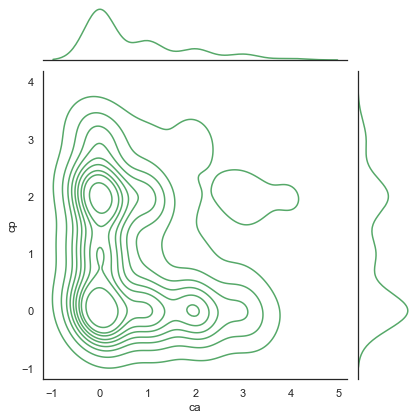

In [71]:
sns.set(style="white")
sns.jointplot(x="chol",y="age",kind="kde",color="g",data=heartdf)


sns.set(style="white")
sns.jointplot(x="thalach",y="cp",kind="hex",color="g",data=heartdf)

sns.set(style="white")
sns.jointplot(x="trestbps",y="ca",kind="hex",color="g",data=heartdf)


sns.set(style="white")
sns.jointplot(x="oldpeak",y="thal",kind="kde",color="g",data=heartdf)


sns.set(style="white")
sns.jointplot(x="ca",y="thal",kind="kde",color="g",data=heartdf)


sns.set(style="white")
sns.jointplot(x="ca",y="cp",kind="kde",color="g",data=heartdf)

<b><font size="4">8. Cat Plot</font></b>

In [72]:
#CAT PLOT
#This plot combines facetgrid and swarmplot.

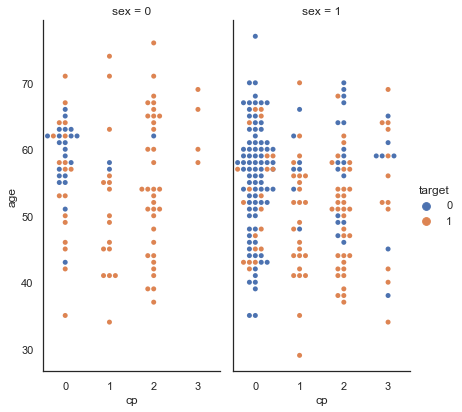

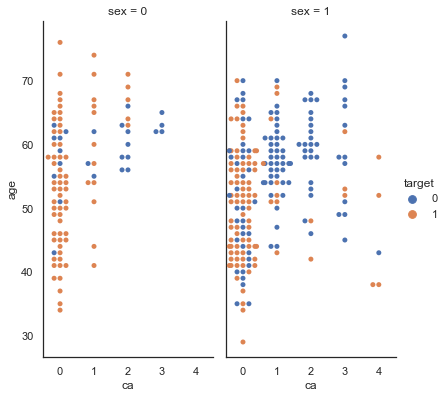

In [73]:
sns.catplot(x="cp", y="age",hue="target", col="sex",data=heartdf, kind="swarm",height=5.7, aspect=.5)
sns.catplot(x="ca", y="age",hue="target", col="sex",data=heartdf, kind="swarm",height=5.5, aspect=.5)